# Quarta esperienza

## Import dipendenze

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

## Misura dello slew rate

In [42]:
V_i = 0.5
nu = 50000
Trise_10_90 =  1

## Misura del GxBW

In [43]:
# Frequenze suggerite:
print(np.logspace(1,2.8, 4, base=10).round(-1))
print(np.logspace(2.8,5.5, 20,base=10).round(-1)[1:])
print(np.logspace(5.5, 6, 3,).round(-4)[1:])


[ 10.  40. 160. 630.]
[   880.   1210.   1680.   2340.   3240.   4490.   6230.   8650.  11990.
  16640.  23080.  32010.  44400.  61580.  85420. 118490. 164360. 227980.
 316230.]
[ 560000. 1000000.]


In [44]:
R = 1000
R_primo = np.array([4700, 33000, 100000, 220000])

In [45]:
nu=np.array([])

V_in_1 = np.array([]) #circa 1V
V_out_1 =np.array([])

V_in_2 = np.array([]) #circa 0.1V
V_out_2 =np.array([])

V_in_3 = np.array([]) #circa 0.05V
V_out_3 =np.array([])

V_in_4 = np.array([]) #Circa 0.03V
V_out_4 =np.array([])

In [46]:
A_1, A_2, A_3, A_4 = V_out_1/V_in_1, V_out_2/V_in_2, V_out_3/V_in_3, V_out_4/V_in_4

G_BW_1 = A_1*nu
G_BW_2 = A_2*nu
G_BW_3 = A_3*nu
G_BW_4 = A_4*nu

G_1, G_2, G_3, G_4 = 20*np.log10(A_1), 20*np.log10(A_2), 20*np.log10(A_3), 20*np.log10(A_4)

In [54]:
sigmaV = lambda a: a*0.03
sigmaNu = lambda a: a*0.03
sigmaG = np.sqrt(2)*(3/5)/np.log(10)

Text(0, 0.5, 'Guadagno G (dB)')

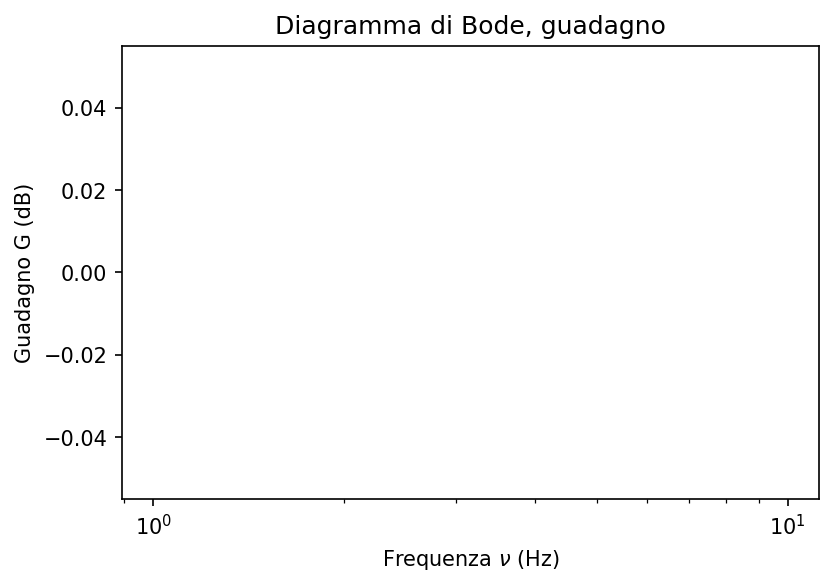

In [53]:
plt.errorbar(nu, G_1, sigmaG, color="orange")
plt.errorbar(nu, G_2, sigmaG, color="red")
plt.errorbar(nu, G_3, sigmaG, color="blue")
plt.errorbar(nu, G_4, sigmaG, color="green")
plt.xscale("log")
plt.title("Diagramma di Bode, guadagno")
plt.xlabel("Frequenza $\\nu$ (Hz)")
plt.ylabel("Guadagno G (dB)")

In [55]:
def tabmaker(l):
    st = ""
    for i in range(len(l[0][1])):
        for j in range(len(l)):
            col = l[j]
            #print(col)
            st+="${}\pm{}$ & ".format(np.round(col[1][i], 4), np.round(col[0](col[1][i]), 2))
        st += " \\\ "
    return st